In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('cleaned_integrated_data_20241024102534.csv')
df = df.rename(columns={'Unnamed: 0': 'Index'})
df.head()

,timestamp,sensor_2,sensor_4,mv_1,mv_2,mv_3,mv_4,fhp,prediction,notes,bad_posture_command,model_threshold,model_notes
0,3172334658,NaN,NaN,888.0,895.0,891.0,895.0,NaN,NaN,NaN,no,NaN,NaN
1,3172334668,850.0,822.0,823.0,822.0,821.0,822.0,NaN,NaN,Sensor 2 val replaced by max valid val,no,71.5,Thresholds changed from nan to 71.5 at 3172334...
2,3172335158,NaN,NaN,888.0,889.0,891.0,895.0,NaN,NaN,NaN,no,71.5,NaN
3,3172335168,NaN,NaN,823.0,824.0,821.0,822.0,NaN,NaN,NaN,no,71.5,NaN
4,3172335178,850.0,823.0,NaN,NaN,NaN,NaN,48.0,1.0,NaN,no,71.5,NaN


In [3]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            3873 non-null   int64  
 1   sensor_2             1342 non-null   float64
 2   sensor_4             1342 non-null   float64
 3   mv_1                 2678 non-null   float64
 4   mv_2                 2678 non-null   float64
 5   mv_3                 2678 non-null   float64
 6   mv_4                 2678 non-null   float64
 7   fhp                  630 non-null    float64
 8   prediction           1341 non-null   float64
 9   notes                92 non-null     object 
 10  bad_posture_command  3873 non-null   object 
 11  model_threshold      3872 non-null   float64
 12  model_notes          1 non-null      object 
dtypes: float64(9), int64(1), object(3)
memory usage: 393.5+ KB


In [4]:
df.describe()

,timestamp,sensor_2,sensor_4,mv_1,mv_2,mv_3,mv_4,fhp,prediction,model_threshold
count,3.873000e+03,1342.000000,1342.000000,2678.000000,2678.000000,2678.000000,2678.000000,630.000000,1341.000000,3872.0
mean,3.172739e+09,699.206408,726.264531,726.976475,727.199403,727.774085,727.656087,69.307937,0.861298,71.5
std,2.546613e+05,96.774135,70.949915,115.464661,113.352129,111.808401,115.327683,34.678543,0.345765,0.0
min,3.172335e+09,216.000000,296.000000,178.000000,149.000000,310.000000,227.000000,33.000000,0.000000,71.5
25%,3.172519e+09,635.000000,699.250000,673.000000,672.000000,672.000000,673.250000,45.000000,1.000000,71.5
50%,3.172733e+09,687.000000,732.000000,724.000000,726.000000,726.000000,727.000000,65.000000,1.000000,71.5
75%,3.172965e+09,762.000000,764.000000,771.000000,770.000000,772.000000,772.000000,81.000000,1.000000,71.5
max,3.173197e+09,850.000000,850.000000,1292.000000,1273.000000,1252.000000,1255.000000,256.000000,1.000000,71.5


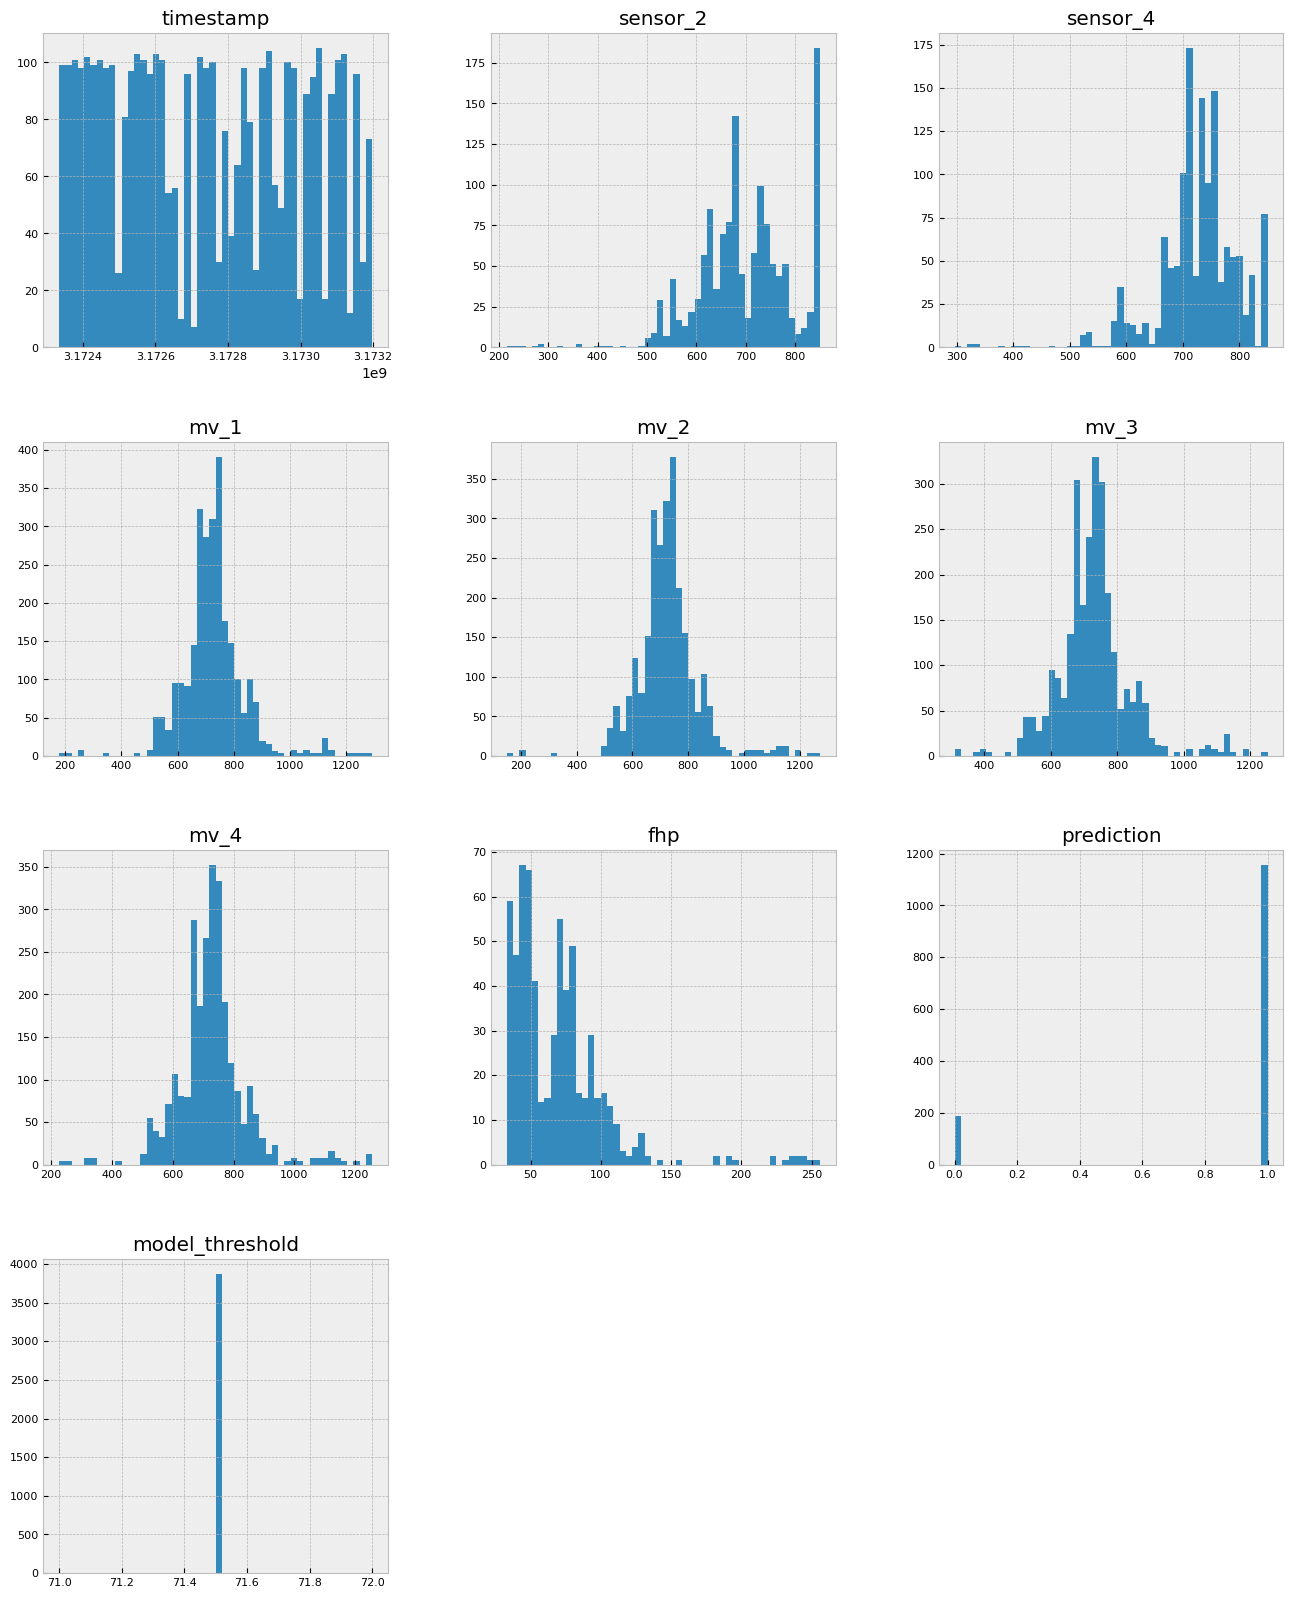

In [5]:
#All numeric values v. all numeric values plots
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

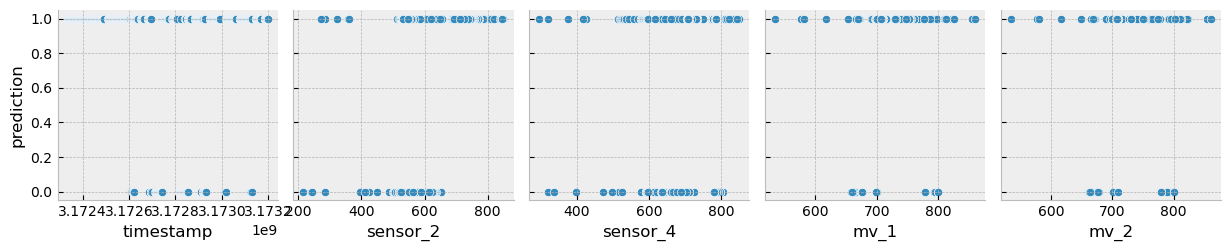

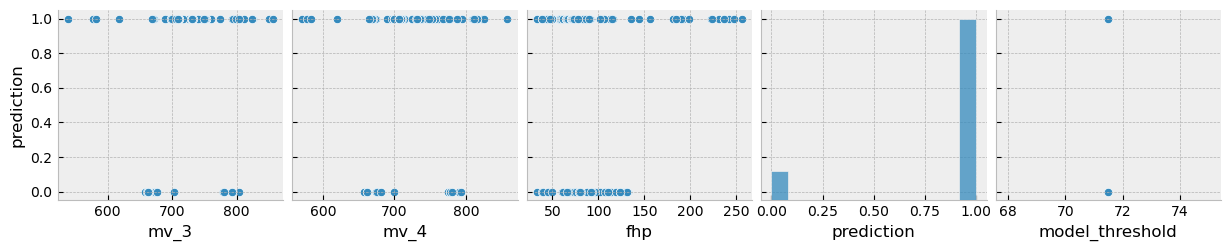

In [9]:
#prediction v. all other values
numeric_df = df.select_dtypes(include='number').copy()
for i in range(0, len(numeric_df.columns), 5):
    sns.pairplot(data=df,
                x_vars=numeric_df.columns[i:i+5],
                y_vars=['prediction'])

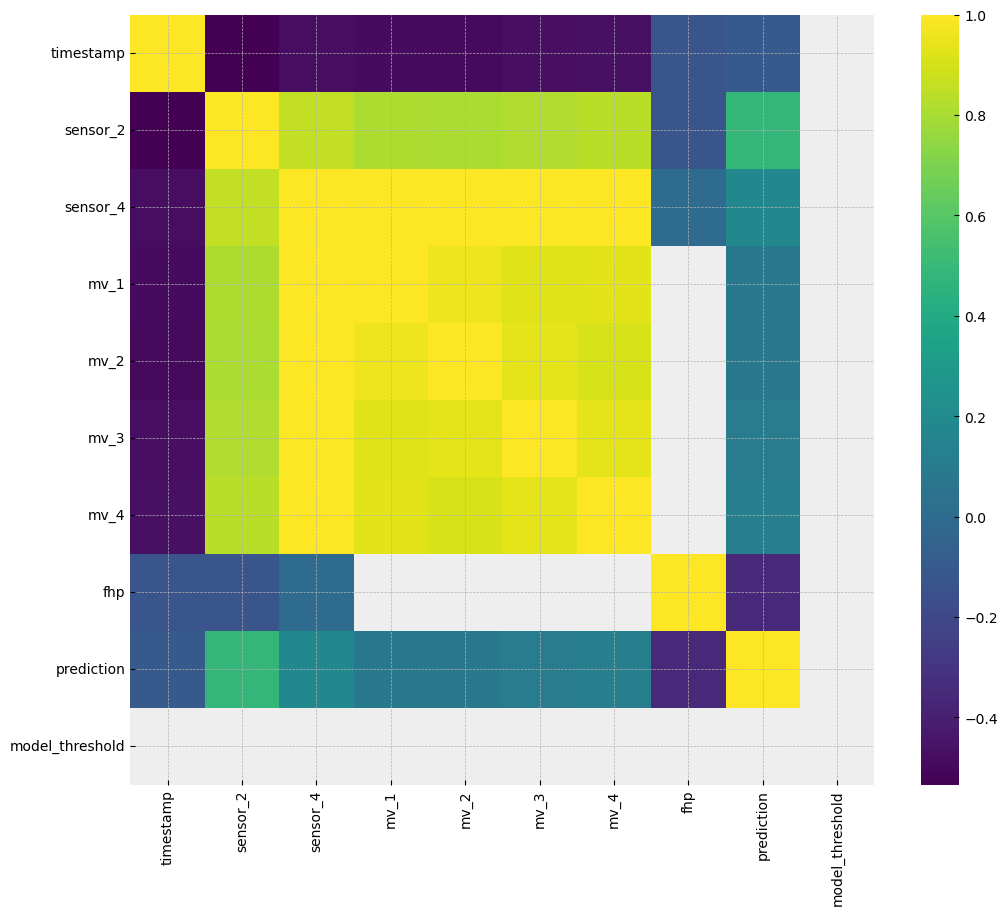

In [10]:
#"Heat Map", full
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(numeric_df.corr(), cmap="viridis", annot=False)

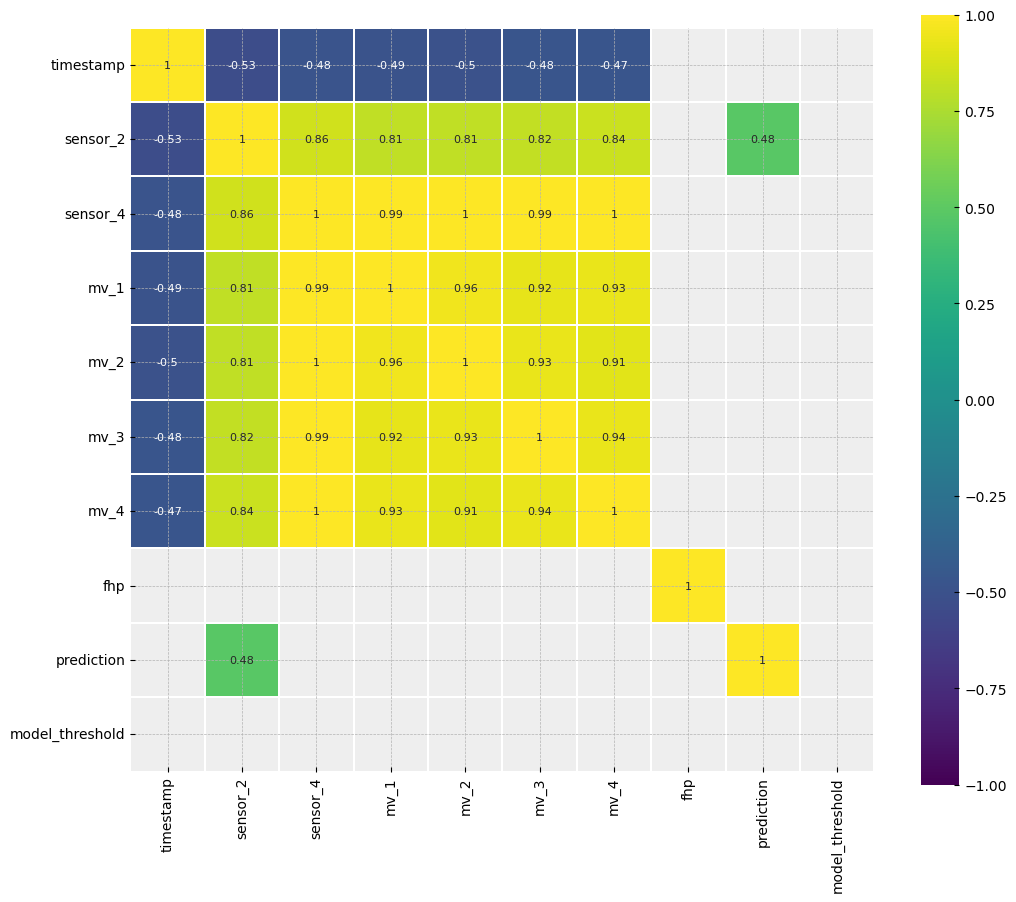

In [11]:
#"Heap Map", filtered
corr = numeric_df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);